In [1]:
import pandas as pd
import os
from pathlib import Path
from datetime import datetime
import numpy as np

In [2]:
files = os.listdir('./example_data')

In [3]:
folder = Path('./example_data')

In [30]:
with open(folder/files[0]) as file:
    header_list = file.readline()

header_list = header_list.split(' ')
header_list[-1] = header_list[-1][:-1]
print(header_list)

['timestamp', 'temperature', 'humidity', 'pressure', 'pm10_standard', 'pm25_standard', 'pm100_standard', 'pm10_env', 'pm25_env', 'pm100_env', 'particles_03um', 'particles_05um', 'particles_10um', 'particles_25um', 'particles_50um', 'particles_100um']


In [31]:
header_dtypes = [float, float, float, float,
                 int, int, int, int,
                 int, int, int, int,
                 int, int, int, int]

In [34]:
header_dict = dict(zip(header_list, header_dtypes))

In [37]:
df = pd.read_csv(folder/files[0], delimiter=' ', header=0, index_col=False, na_values='None')

In [38]:
df = df.dropna()

In [39]:
df

,timestamp,temperature,humidity,pressure,pm10_standard,pm25_standard,pm100_standard,pm10_env,pm25_env,pm100_env,particles_03um,particles_05um,particles_10um,particles_25um,particles_50um,particles_100um
0,1.631690e+09,18.556641,59.972400,983.460223,7.0,9.0,9.0,7.0,9.0,9.0,2520.0,388.0,45.0,2.0,0.0,0.0
1,1.631690e+09,18.556641,59.925254,983.444045,6.0,9.0,9.0,6.0,9.0,9.0,2526.0,374.0,45.0,2.0,0.0,0.0
2,1.631690e+09,18.551562,60.065809,983.457467,6.0,9.0,9.0,6.0,9.0,9.0,2526.0,374.0,45.0,2.0,0.0,0.0
3,1.631690e+09,18.551562,59.960229,983.445723,5.0,8.0,8.0,5.0,8.0,8.0,2526.0,374.0,45.0,2.0,0.0,0.0
4,1.631690e+09,18.541406,59.784037,983.456089,6.0,9.0,9.0,6.0,9.0,9.0,2532.0,393.0,45.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1.631693e+09,18.424609,58.975513,983.462633,5.0,9.0,9.0,5.0,9.0,9.0,1266.0,361.0,69.0,4.0,0.0,0.0
716,1.631693e+09,18.424609,58.828866,983.466285,5.0,9.0,9.0,5.0,9.0,9.0,1266.0,361.0,69.0,4.0,0.0,0.0
717,1.631693e+09,18.414453,58.922721,983.478323,5.0,9.0,9.0,5.0,9.0,9.0,1266.0,361.0,69.0,4.0,0.0,0.0
718,1.631693e+09,18.414453,58.770206,983.467175,6.0,10.0,10.0,6.0,10.0,10.0,1233.0,350.0,62.0,6.0,0.0,0.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 719
Data columns (total 16 columns):
timestamp          717 non-null float64
temperature        717 non-null float64
humidity           717 non-null float64
pressure           717 non-null float64
pm10_standard      717 non-null float64
pm25_standard      717 non-null float64
pm100_standard     717 non-null float64
pm10_env           717 non-null float64
pm25_env           717 non-null float64
pm100_env          717 non-null float64
particles_03um     717 non-null float64
particles_05um     717 non-null float64
particles_10um     717 non-null float64
particles_25um     717 non-null float64
particles_50um     717 non-null float64
particles_100um    717 non-null float64
dtypes: float64(16)
memory usage: 95.2 KB


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

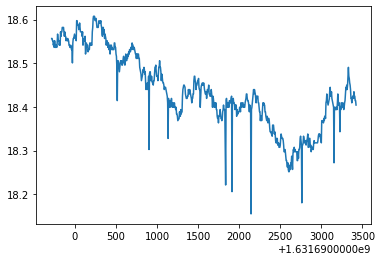

In [50]:
plt.plot(df['timestamp'], df['temperature'])

In [53]:
dt_utc = pd.to_datetime(df['timestamp'], unit='s', utc=True)

In [56]:
dt = dt_utc.dt.tz_convert('America/Los_Angeles')

In [57]:
dt

0     2021-09-15 00:08:36.312413454-07:00
1     2021-09-15 00:08:41.465367794-07:00
2     2021-09-15 00:08:46.620023489-07:00
3     2021-09-15 00:08:51.774501801-07:00
4     2021-09-15 00:08:56.931112528-07:00
                      ...                
715   2021-09-15 01:10:01.793066978-07:00
716   2021-09-15 01:10:06.947284222-07:00
717   2021-09-15 01:10:12.098280668-07:00
718   2021-09-15 01:10:17.252898455-07:00
719   2021-09-15 01:10:22.407492638-07:00
Name: timestamp, Length: 717, dtype: datetime64[ns, America/Los_Angeles]

In [58]:
df['timestamp'] = dt

In [59]:
df

,timestamp,temperature,humidity,pressure,pm10_standard,pm25_standard,pm100_standard,pm10_env,pm25_env,pm100_env,particles_03um,particles_05um,particles_10um,particles_25um,particles_50um,particles_100um
0,2021-09-15 00:08:36.312413454-07:00,18.556641,59.972400,983.460223,7.0,9.0,9.0,7.0,9.0,9.0,2520.0,388.0,45.0,2.0,0.0,0.0
1,2021-09-15 00:08:41.465367794-07:00,18.556641,59.925254,983.444045,6.0,9.0,9.0,6.0,9.0,9.0,2526.0,374.0,45.0,2.0,0.0,0.0
2,2021-09-15 00:08:46.620023489-07:00,18.551562,60.065809,983.457467,6.0,9.0,9.0,6.0,9.0,9.0,2526.0,374.0,45.0,2.0,0.0,0.0
3,2021-09-15 00:08:51.774501801-07:00,18.551562,59.960229,983.445723,5.0,8.0,8.0,5.0,8.0,8.0,2526.0,374.0,45.0,2.0,0.0,0.0
4,2021-09-15 00:08:56.931112528-07:00,18.541406,59.784037,983.456089,6.0,9.0,9.0,6.0,9.0,9.0,2532.0,393.0,45.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2021-09-15 01:10:01.793066978-07:00,18.424609,58.975513,983.462633,5.0,9.0,9.0,5.0,9.0,9.0,1266.0,361.0,69.0,4.0,0.0,0.0
716,2021-09-15 01:10:06.947284222-07:00,18.424609,58.828866,983.466285,5.0,9.0,9.0,5.0,9.0,9.0,1266.0,361.0,69.0,4.0,0.0,0.0
717,2021-09-15 01:10:12.098280668-07:00,18.414453,58.922721,983.478323,5.0,9.0,9.0,5.0,9.0,9.0,1266.0,361.0,69.0,4.0,0.0,0.0
718,2021-09-15 01:10:17.252898455-07:00,18.414453,58.770206,983.467175,6.0,10.0,10.0,6.0,10.0,10.0,1233.0,350.0,62.0,6.0,0.0,0.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 719
Data columns (total 16 columns):
timestamp          717 non-null datetime64[ns, America/Los_Angeles]
temperature        717 non-null float64
humidity           717 non-null float64
pressure           717 non-null float64
pm10_standard      717 non-null float64
pm25_standard      717 non-null float64
pm100_standard     717 non-null float64
pm10_env           717 non-null float64
pm25_env           717 non-null float64
pm100_env          717 non-null float64
particles_03um     717 non-null float64
particles_05um     717 non-null float64
particles_10um     717 non-null float64
particles_25um     717 non-null float64
particles_50um     717 non-null float64
particles_100um    717 non-null float64
dtypes: datetime64[ns, America/Los_Angeles](1), float64(15)
memory usage: 115.2 KB


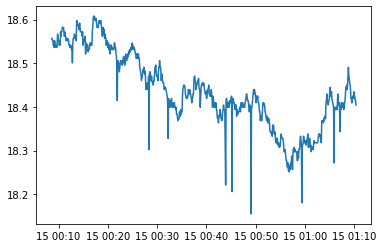

In [62]:
plt.plot(df['timestamp'], df['temperature'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2d1088eb908>,
 'caps': [<matplotlib.lines.Line2D at 0x2d1088ebd88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d1088eb288>,
 'medians': [<matplotlib.lines.Line2D at 0x2d1088eb708>,
 'fliers': [<matplotlib.lines.Line2D at 0x2d1088f1848>,
 'means': [<matplotlib.lines.Line2D at 0x2d1088c4388>,
  <matplotlib.lines.Line2D at 0x2d10890ef88>]}

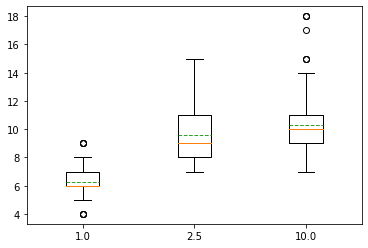

In [80]:
plt.boxplot(df.iloc[:, 7:10], labels=['1.0', '2.5', '10.0'], meanline=True, showmeans=True)

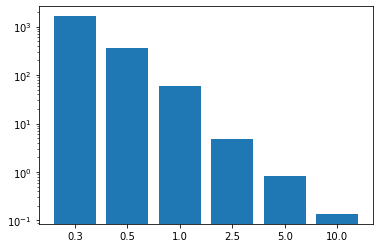

In [76]:
plt.bar(['0.3', '0.5', '1.0', '2.5', '5.0', '10.0'], height=df.iloc[:, 10:].mean(axis=0))
plt.yscale('log')

In [77]:
df.iloc[:, -1].mean()

0.13668061366806136